# Liputan6 — Exploratory Data Analysis (EDA)

## 🎯 Tujuan
Analisis eksploratori dataset Liputan6 untuk memahami karakteristik data sebelum preprocessing dan training.

## 📊 Analisis yang Dilakukan:
1. **Data Overview** - Struktur dataset, kolom, tipe data
2. **Missing Values** - Identifikasi dan visualisasi data yang hilang
3. **Text Length Distribution** - Panjang artikel dan ringkasan
4. **Sentence Count** - Jumlah kalimat per artikel
5. **Text Examples** - Contoh artikel terpendek dan terpanjang
6. **Word Frequency** - Kata-kata yang paling sering muncul
7. **Stopwords Analysis** - Analisis stopwords Bahasa Indonesia
8. **Data Quality** - Duplikasi dan anomali data

---

💡 **Catatan**: Setelah EDA selesai, lanjutkan ke `Liputan6_Preprocessing.ipynb` untuk preprocessing data.

## 📚 Table of Contents

- [Langkah 1 — Setup & Load Data](#step1)
- [Langkah 2 — Data Overview](#step2)
- [Langkah 3 — Missing Values Analysis](#step3)
- [Langkah 4 — Text Length Distribution](#step4)
- [Langkah 5 — Sentence Count Analysis](#step5)
- [Langkah 6 — Text Examples](#step6)
- [Langkah 7 — Word Frequency Analysis](#step7)
- [Langkah 8 — Stopwords Analysis](#step8)
- [Langkah 9 — Summary & Insights](#step9)

<a id="step1"></a>
## Langkah 1 — Setup & Load Data

Import libraries dan load dataset.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pathlib import Path
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


In [2]:
# ============================================================
# Dataset Selection
# ============================================================
USE_SAMPLE = True  # Set False untuk full dataset

if USE_SAMPLE:
    TRAIN_PATH = "csv_data/sample_data/liputan6_train_sample5.csv"
    TEST_PATH = "csv_data/sample_data/liputan6_test_sample5.csv"
    VAL_PATH = "csv_data/sample_data/liputan6_validation_sample5.csv"
    print("🚀 Using 5% SAMPLE data for faster EDA")
else:
    TRAIN_PATH = "csv_data/all_data/liputan6_train.csv"
    TEST_PATH = "csv_data/all_data/liputan6_test.csv"
    VAL_PATH = "csv_data/all_data/liputan6_validation.csv"
    print("📊 Using FULL dataset")

OUTPUT_DIR = Path("./output/eda")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

print(f"\n📁 Paths:")
print(f"  Train: {TRAIN_PATH}")
print(f"  Output: {OUTPUT_DIR}")

🚀 Using 5% SAMPLE data for faster EDA

📁 Paths:
  Train: csv_data/sample_data/liputan6_train_sample5.csv
  Output: output\eda


In [3]:
# Load dataset
print("📂 Loading dataset...\n")

try:
    df_train = pd.read_csv(TRAIN_PATH, low_memory=False)
    df_test = pd.read_csv(TEST_PATH, low_memory=False)
    df_val = pd.read_csv(VAL_PATH, low_memory=False)
    
    print(f"✓ Successfully loaded:")
    print(f"  Train: {len(df_train):,} rows | {len(df_train.columns)} cols")
    print(f"  Test: {len(df_test):,} rows | {len(df_test.columns)} cols")
    print(f"  Val: {len(df_val):,} rows | {len(df_val.columns)} cols")
    print(f"  Total: {len(df_train) + len(df_test) + len(df_val):,} rows")
    
    # Use training data for EDA
    df = df_train.copy()
    
    # Detect columns
    possible_article_cols = ['article', 'clean_article', 'text', 'content']
    possible_summary_cols = ['summary', 'clean_summary', 'ringkasan']
    
    article_col = next((col for col in possible_article_cols if col in df.columns), None)
    summary_col = next((col for col in possible_summary_cols if col in df.columns), None)
    
    print(f"\n✓ Detected columns:")
    print(f"  Article: {article_col}")
    print(f"  Summary: {summary_col}")
    
    display(df.head(2))
    
except FileNotFoundError as e:
    print(f"❌ Error: {e}")
    print("\n💡 Jalankan csv_converter.py atau create_sample_data.py terlebih dahulu.")
    raise

📂 Loading dataset...

✓ Successfully loaded:
  Train: 9,694 rows | 5 cols
  Test: 549 rows | 5 cols
  Val: 549 rows | 5 cols
  Total: 10,792 rows

✓ Detected columns:
  Article: article
  Summary: summary


,id,url,article,summary,extractive_summary
0,161648,https://www.liputan6.com/news/read/161648/dua-...,"Liputan6 . com , Pandeglang : Sebuah ledakan k...",Dua orang tewas seketika akibat ledakan dahsya...,"[2, 7]"
1,282955,https://www.liputan6.com/news/read/282955/kana...,"Liputan6 . com , Ottawa : Setelah keputusan De...",Kanada menyetujui tindakan DK PBB dan akan iku...,"[1, 4]"


<a id="step2"></a>
## Langkah 2 — Data Overview

Profiling data: tipe data, statistik deskriptif, dan struktur umum.

In [4]:
print("📊 Dataset Information:\n")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\nData Types:")
display(df.dtypes)

print("\n📈 Descriptive Statistics:")
display(df.describe(include='all').transpose().fillna(''))

📊 Dataset Information:

Shape: (9694, 5)
Columns: ['id', 'url', 'article', 'summary', 'extractive_summary']

Data Types:


id                     int64
url                   object
article               object
summary               object
extractive_summary    object
dtype: object


📈 Descriptive Statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,9694.0,,,,167608.991129,78375.272858,26415.0,101898.75,171741.0,233293.75,299988.0
url,9694.0,9694,https://www.liputan6.com/news/read/161648/dua-...,1,,,,,,,
article,9694.0,9694,"Liputan6 . com , Pandeglang : Sebuah ledakan k...",1,,,,,,,
summary,9694.0,9694,Dua orang tewas seketika akibat ledakan dahsya...,1,,,,,,,
extractive_summary,9694.0,1109,"[0, 1]",1443,,,,,,,


<a id="step3"></a>
## Langkah 3 — Missing Values Analysis

Identifikasi dan visualisasi data yang hilang.

📊 Missing Values by Column:




,missing_fraction
id,0.0
url,0.0
article,0.0
summary,0.0
extractive_summary,0.0


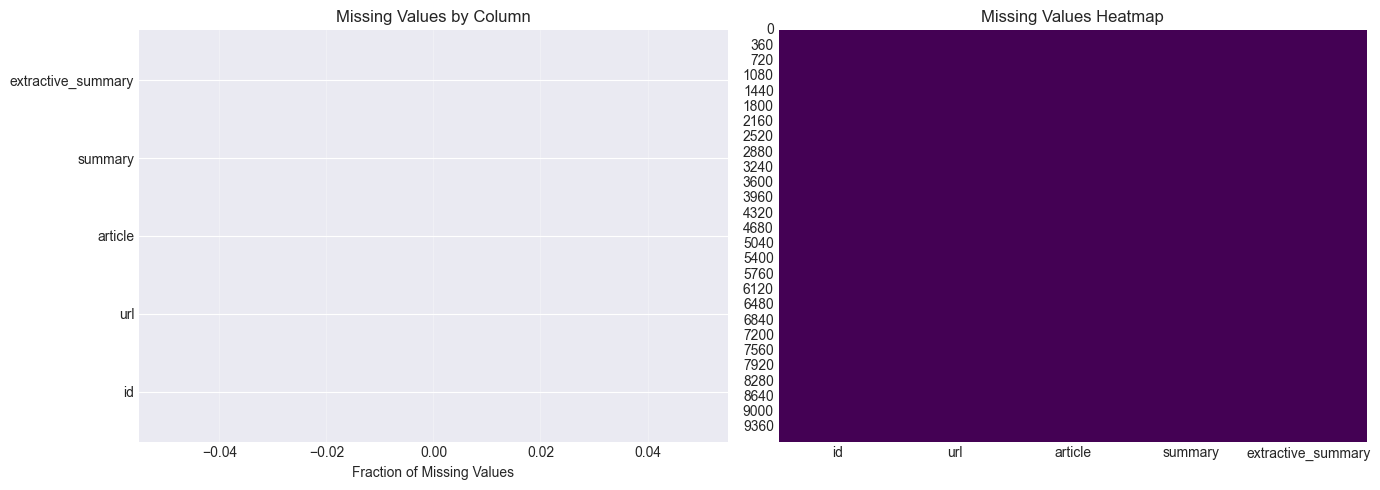


✓ Plot saved to output\eda\missing_values.png


In [5]:
# Missing values analysis
null_frac = df.isna().mean().sort_values(ascending=False)

print("📊 Missing Values by Column:\n")
display(null_frac.to_frame('missing_fraction'))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].barh(range(len(null_frac)), null_frac.values)
axes[0].set_yticks(range(len(null_frac)))
axes[0].set_yticklabels(null_frac.index)
axes[0].set_xlabel('Fraction of Missing Values')
axes[0].set_title('Missing Values by Column')
axes[0].grid(axis='x', alpha=0.3)

# Heatmap
sns.heatmap(df.isna(), cbar=False, ax=axes[1], cmap='viridis')
axes[1].set_title('Missing Values Heatmap')

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'missing_values.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✓ Plot saved to {OUTPUT_DIR / 'missing_values.png'}")

📊 Duplicate Analysis:
  Duplicate articles: 0 (0.00%)
  Duplicate summaries: 0 (0.00%)


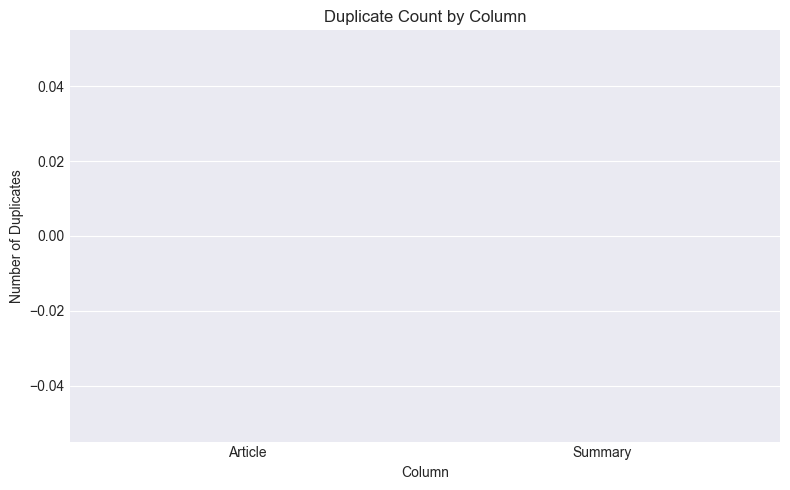

In [6]:
# Duplicate analysis
if article_col and article_col in df.columns:
    dup_article = df.duplicated(subset=[article_col]).sum()
else:
    dup_article = 0

if summary_col and summary_col in df.columns:
    dup_summary = df.duplicated(subset=[summary_col]).sum()
else:
    dup_summary = 0

print(f"📊 Duplicate Analysis:")
print(f"  Duplicate articles: {dup_article:,} ({dup_article/len(df)*100:.2f}%)")
print(f"  Duplicate summaries: {dup_summary:,} ({dup_summary/len(df)*100:.2f}%)")

# Visualization
dup_df = pd.DataFrame({
    'Column': ['Article', 'Summary'],
    'Duplicates': [dup_article, dup_summary]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=dup_df, x='Column', y='Duplicates', palette='Set2')
plt.title('Duplicate Count by Column')
plt.ylabel('Number of Duplicates')
plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'duplicates.png', dpi=300, bbox_inches='tight')
plt.show()

<a id="step4"></a>
## Langkah 4 — Text Length Distribution

Analisis panjang artikel dan ringkasan (dalam jumlah kata).

📊 Article Length Statistics:
  Mean: 233.2 words
  Median: 197 words
  90th percentile: 391 words
  Max: 1932 words

📊 Summary Length Statistics:
  Mean: 31.1 words
  Median: 30 words
  90th percentile: 39 words
  Max: 95 words

📊 Compression Ratio:
  Mean: 16.45%
  Median: 14.78%


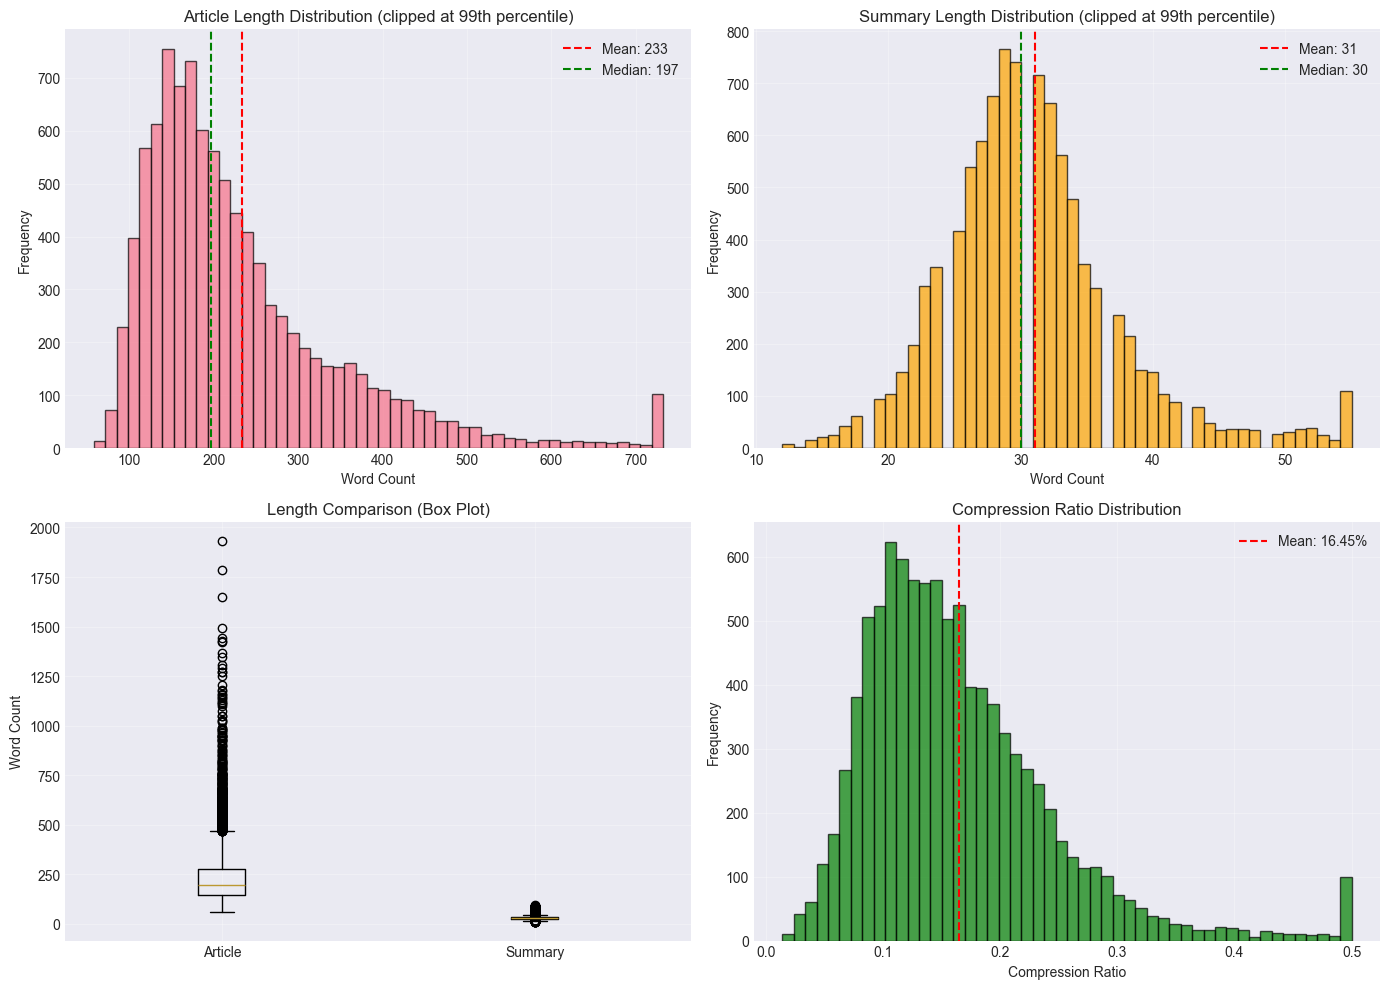


✓ Plot saved to output\eda\length_distribution.png


In [7]:
def count_words(s):
    """Count words in a string"""
    if pd.isna(s):
        return 0
    return len(str(s).split())

if article_col and summary_col:
    # Calculate word counts
    art_len = df[article_col].apply(count_words)
    sum_len = df[summary_col].apply(count_words)
    
    # Statistics
    print("📊 Article Length Statistics:")
    print(f"  Mean: {art_len.mean():.1f} words")
    print(f"  Median: {art_len.median():.0f} words")
    print(f"  90th percentile: {np.percentile(art_len, 90):.0f} words")
    print(f"  Max: {art_len.max()} words")
    
    print("\n📊 Summary Length Statistics:")
    print(f"  Mean: {sum_len.mean():.1f} words")
    print(f"  Median: {sum_len.median():.0f} words")
    print(f"  90th percentile: {np.percentile(sum_len, 90):.0f} words")
    print(f"  Max: {sum_len.max()} words")
    
    # Compression ratio
    compression_ratio = sum_len / art_len
    print(f"\n📊 Compression Ratio:")
    print(f"  Mean: {compression_ratio.mean():.2%}")
    print(f"  Median: {compression_ratio.median():.2%}")
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Article length histogram
    axes[0, 0].hist(art_len.clip(upper=np.percentile(art_len, 99)), bins=50, edgecolor='black', alpha=0.7)
    axes[0, 0].axvline(art_len.mean(), color='red', linestyle='--', label=f'Mean: {art_len.mean():.0f}')
    axes[0, 0].axvline(art_len.median(), color='green', linestyle='--', label=f'Median: {art_len.median():.0f}')
    axes[0, 0].set_xlabel('Word Count')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Article Length Distribution (clipped at 99th percentile)')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)
    
    # Summary length histogram
    axes[0, 1].hist(sum_len.clip(upper=np.percentile(sum_len, 99)), bins=50, edgecolor='black', alpha=0.7, color='orange')
    axes[0, 1].axvline(sum_len.mean(), color='red', linestyle='--', label=f'Mean: {sum_len.mean():.0f}')
    axes[0, 1].axvline(sum_len.median(), color='green', linestyle='--', label=f'Median: {sum_len.median():.0f}')
    axes[0, 1].set_xlabel('Word Count')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_title('Summary Length Distribution (clipped at 99th percentile)')
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)
    
    # Box plot comparison
    axes[1, 0].boxplot([art_len, sum_len], labels=['Article', 'Summary'])
    axes[1, 0].set_ylabel('Word Count')
    axes[1, 0].set_title('Length Comparison (Box Plot)')
    axes[1, 0].grid(alpha=0.3)
    
    # Compression ratio
    axes[1, 1].hist(compression_ratio.clip(lower=0.01, upper=0.5), bins=50, edgecolor='black', alpha=0.7, color='green')
    axes[1, 1].axvline(compression_ratio.mean(), color='red', linestyle='--', label=f'Mean: {compression_ratio.mean():.2%}')
    axes[1, 1].set_xlabel('Compression Ratio')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].set_title('Compression Ratio Distribution')
    axes[1, 1].legend()
    axes[1, 1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / 'length_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n✓ Plot saved to {OUTPUT_DIR / 'length_distribution.png'}")
else:
    print("⚠️  Could not analyze text length: columns not found")

<a id="step5"></a>
## Langkah 5 — Sentence Count Analysis

Analisis jumlah kalimat per artikel.

📊 Sentence Count Statistics:
  Mean: 15.1 sentences
  Median: 13 sentences
  90th percentile: 24 sentences
  Max: 157 sentences


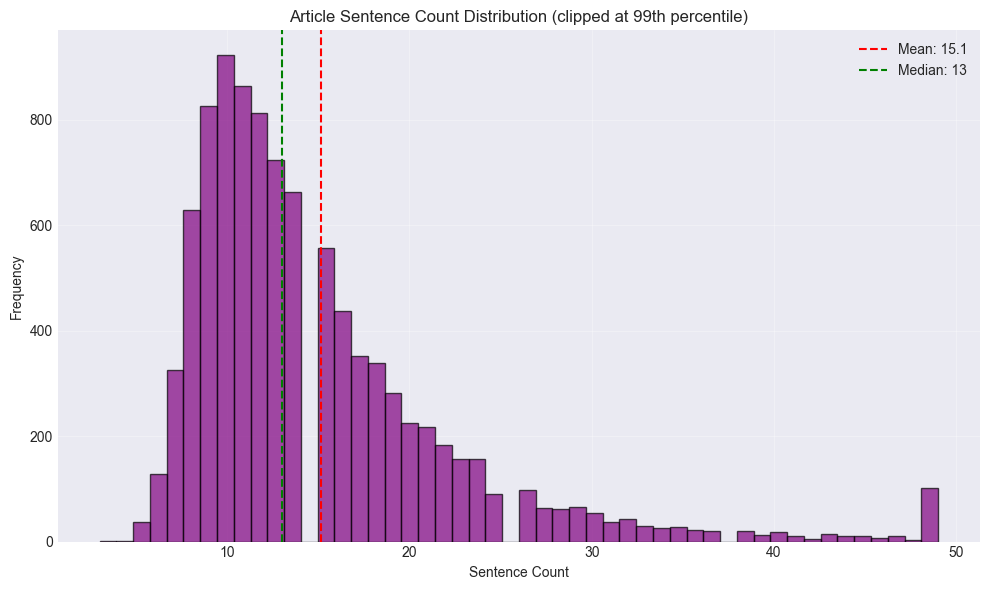


✓ Plot saved to output\eda\sentence_count.png


In [8]:
def count_sentences(text):
    """Count sentences in text (simple splitting by punctuation)"""
    if pd.isna(text):
        return 0
    parts = re.split(r'[.!?;]+', str(text))
    return len([p for p in parts if p.strip() != ''])

if article_col:
    sent_counts = df[article_col].apply(count_sentences)
    
    print("📊 Sentence Count Statistics:")
    print(f"  Mean: {sent_counts.mean():.1f} sentences")
    print(f"  Median: {sent_counts.median():.0f} sentences")
    print(f"  90th percentile: {np.percentile(sent_counts, 90):.0f} sentences")
    print(f"  Max: {sent_counts.max()} sentences")
    
    # Visualization
    plt.figure(figsize=(10, 6))
    plt.hist(sent_counts.clip(upper=np.percentile(sent_counts, 99)), bins=50, edgecolor='black', alpha=0.7, color='purple')
    plt.axvline(sent_counts.mean(), color='red', linestyle='--', label=f'Mean: {sent_counts.mean():.1f}')
    plt.axvline(sent_counts.median(), color='green', linestyle='--', label=f'Median: {sent_counts.median():.0f}')
    plt.xlabel('Sentence Count')
    plt.ylabel('Frequency')
    plt.title('Article Sentence Count Distribution (clipped at 99th percentile)')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / 'sentence_count.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n✓ Plot saved to {OUTPUT_DIR / 'sentence_count.png'}")

<a id="step6"></a>
## Langkah 6 — Text Examples

Contoh artikel terpendek dan terpanjang.

In [9]:
if article_col and summary_col:
    # Calculate lengths
    art_len = df[article_col].apply(lambda x: len(str(x).split()))
    
    # Shortest articles
    idx_short = art_len.nsmallest(3).index
    print("📋 Shortest Articles:\n")
    for idx in idx_short:
        print(f"Length: {art_len[idx]} words")
        print(f"Article: {df.loc[idx, article_col][:200]}...")
        print(f"Summary: {df.loc[idx, summary_col]}")
        print("-" * 80 + "\n")
    
    # Longest articles
    idx_long = art_len.nlargest(3).index
    print("\n📋 Longest Articles:\n")
    for idx in idx_long:
        print(f"Length: {art_len[idx]} words")
        print(f"Article: {df.loc[idx, article_col][:200]}...")
        print(f"Summary: {df.loc[idx, summary_col]}")
        print("-" * 80 + "\n")

📋 Shortest Articles:

Length: 58 words
Article: Liputan6 . com , Muara Enim : Puluhan penebang kayu akasia di Muara Enim dan Lahat , Sumatra Selatan , terserang penyakit malaria . Bahkan , dua buruh asal Kalimantan Barat meninggal setelah terserang...
Summary: Puluhan buruh penebang kayu akasia di Muara Enim dan Lahat , Sumatra Selatan , terserang penyakit malaria . Dua di antaranya meninggal .
--------------------------------------------------------------------------------

Length: 58 words
Article: Liputan6 . com , Deli Serdang : Sebuah kapal nelayan tenggelam di kawasan Pantai Labu , Deli Serdang , Sumatra Utara , Kamis ( 11/9 ) . Kapal pecah setelah dihantam gelombang tinggi . Dua nelayan berh...
Summary: Kapal nelayan pecah dan tenggelam setelah dihantam gelombang tinggi di kawasan Pantai Labu , Deli Serdang , Sumut . Dua nelayan selamat sementara dua lainnya hilang .
--------------------------------------------------------------------------------

Length: 61 words
Article: TAUFIK

<a id="step7"></a>
## Langkah 7 — Word Frequency Analysis

Kata-kata yang paling sering muncul (dengan stopword removal).

📊 Top 30 Most Common Words (after stopword removal):



,Word,Frequency
0,liputan,10401
1,com,8554
2,jakarta,8083
3,tak,7321
4,tersebut,6407
5,warga,6198
6,tahun,4804
7,menjadi,4710
8,baca,4710
9,rumah,4688


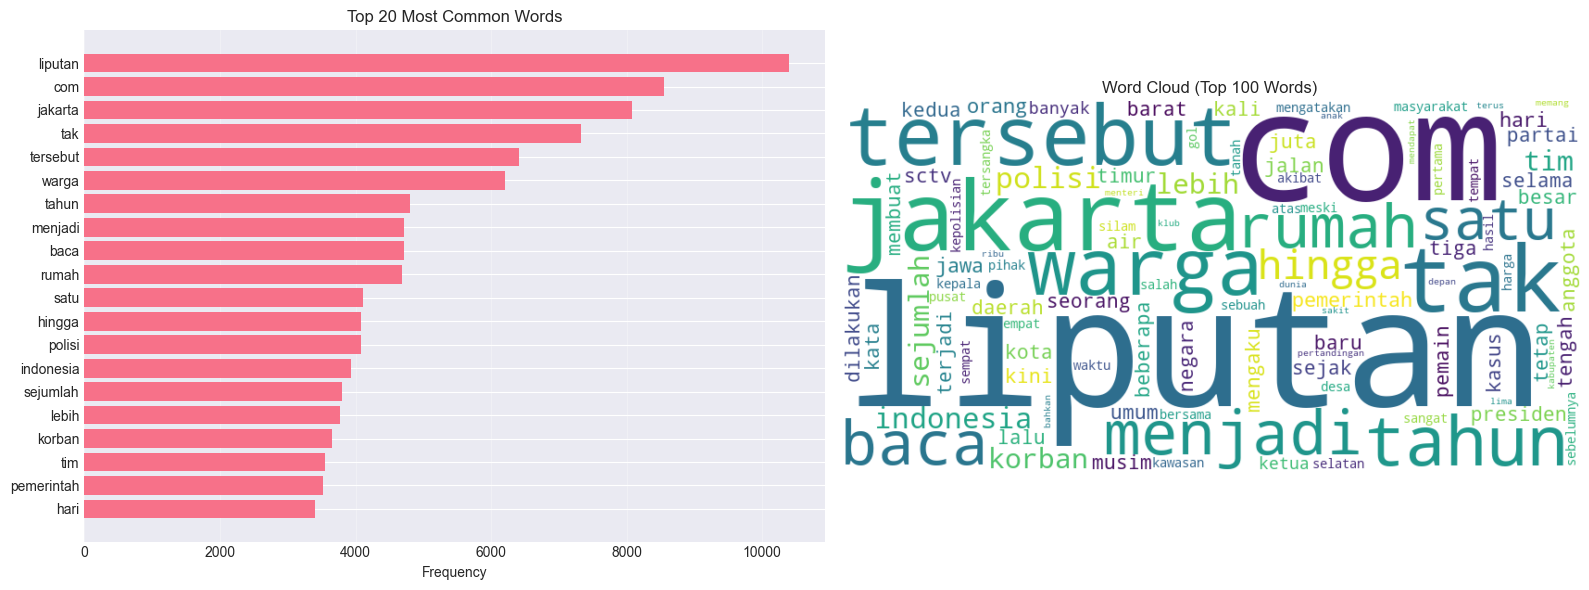


✓ Plot saved to output\eda\word_frequency.png


In [10]:
# Install dependencies if needed
try:
    from wordcloud import WordCloud
    from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
except ImportError:
    import subprocess
    import sys
    print("📦 Installing wordcloud and Sastrawi...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "wordcloud", "Sastrawi"])
    from wordcloud import WordCloud
    from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Combine all articles
text_data = " ".join(df[article_col].dropna().astype(str)).lower()

# Remove non-alphabetic characters
text_data = re.sub(r'[^a-zA-Z\s]', '', text_data)

# Tokenize
tokens = text_data.split()

# Remove stopwords
factory = StopWordRemoverFactory()
stopwords = set(factory.get_stop_words())
filtered_tokens = [t for t in tokens if t not in stopwords and len(t) > 2]

# Count frequencies
counter = Counter(filtered_tokens)
common_words = counter.most_common(30)

print("📊 Top 30 Most Common Words (after stopword removal):\n")
common_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
display(common_df)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
top_20 = common_df.head(20)
axes[0].barh(range(len(top_20)), top_20['Frequency'].values)
axes[0].set_yticks(range(len(top_20)))
axes[0].set_yticklabels(top_20['Word'].values)
axes[0].set_xlabel('Frequency')
axes[0].set_title('Top 20 Most Common Words')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    colormap='viridis'
).generate_from_frequencies(counter)

axes[1].imshow(wordcloud, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Word Cloud (Top 100 Words)')

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'word_frequency.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✓ Plot saved to {OUTPUT_DIR / 'word_frequency.png'}")

<a id="step8"></a>
## Langkah 8 — Stopwords Analysis

Analisis stopwords Bahasa Indonesia yang paling sering muncul.

📊 Top 20 Most Common Stopwords:



,Stopword,Frequency
0,di,43859
1,yang,42313
2,dan,31683
3,ini,19985
4,itu,16511
5,dengan,15269
6,dari,14937
7,untuk,13469
8,dalam,10930
9,ke,9535


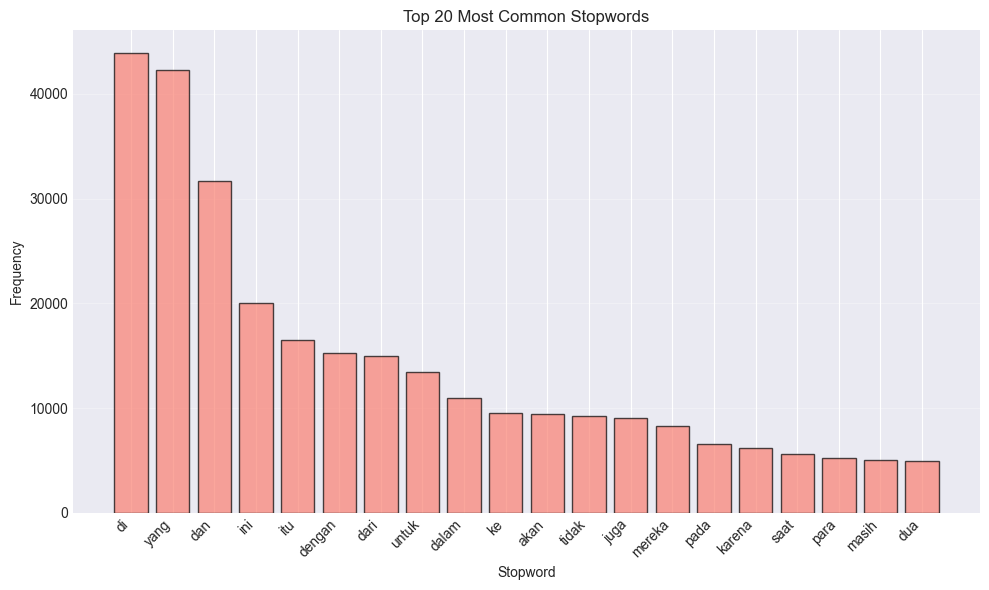


✓ Plot saved to output\eda\stopwords.png


In [11]:
# Extract stopwords
text_data = " ".join(df[article_col].dropna().astype(str)).lower()
text_data = re.sub(r'[^a-zA-Z\s]', ' ', text_data)
tokens = text_data.split()

# Filter only stopwords
stopword_tokens = [t for t in tokens if t in stopwords]

# Count frequencies
stopword_counter = Counter(stopword_tokens)
common_stopwords = stopword_counter.most_common(20)

print("📊 Top 20 Most Common Stopwords:\n")
stop_df = pd.DataFrame(common_stopwords, columns=['Stopword', 'Frequency'])
display(stop_df)

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(stop_df['Stopword'], stop_df['Frequency'], color='salmon', edgecolor='black', alpha=0.7)
plt.xlabel('Stopword')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Stopwords')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'stopwords.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✓ Plot saved to {OUTPUT_DIR / 'stopwords.png'}")

<a id="step9"></a>
## Langkah 9 — Summary & Insights

Ringkasan temuan dari EDA.

In [12]:
# Generate summary report
print("="*80)
print("📊 EDA SUMMARY REPORT")
print("="*80)

print(f"\n📈 Dataset Size:")
print(f"  Total samples: {len(df):,}")
print(f"  Train: {len(df_train):,}")
print(f"  Test: {len(df_test):,}")
print(f"  Val: {len(df_val):,}")

if article_col and summary_col:
    art_len = df[article_col].apply(count_words)
    sum_len = df[summary_col].apply(count_words)
    
    print(f"\n📏 Text Length:")
    print(f"  Article - Mean: {art_len.mean():.1f} words, Median: {art_len.median():.0f} words")
    print(f"  Summary - Mean: {sum_len.mean():.1f} words, Median: {sum_len.median():.0f} words")
    print(f"  Compression Ratio: {(sum_len/art_len).mean():.2%}")

print(f"\n🔍 Data Quality:")
print(f"  Missing values: {df.isna().sum().sum()}")
print(f"  Duplicate articles: {dup_article:,}")
print(f"  Duplicate summaries: {dup_summary:,}")

print(f"\n💡 Key Insights:")
print(f"  ✓ Dataset is {'sample (5%)' if USE_SAMPLE else 'full'}")
print(f"  ✓ Articles have an average of {sent_counts.mean():.1f} sentences")
print(f"  ✓ Summaries are about {(sum_len/art_len).mean():.1%} of original article length")
print(f"  ✓ Most common words (after stopwords): {', '.join([w for w, _ in common_words[:5]])}")

print(f"\n📁 Output Files:")
print(f"  All visualizations saved to: {OUTPUT_DIR}")
print(f"  - missing_values.png")
print(f"  - duplicates.png")
print(f"  - length_distribution.png")
print(f"  - sentence_count.png")
print(f"  - word_frequency.png")
print(f"  - stopwords.png")

print(f"\n🔜 Next Steps:")
print(f"  1. Review EDA findings and visualizations")
print(f"  2. Open Liputan6_Preprocessing.ipynb untuk preprocessing")
print(f"  3. Run preprocessing pipeline")
print(f"  4. Train model dengan Liputan6_BERT2GPT_Training.ipynb")

print("\n" + "="*80)
print("✅ EDA COMPLETE!")
print("="*80)

📊 EDA SUMMARY REPORT

📈 Dataset Size:
  Total samples: 9,694
  Train: 9,694
  Test: 549
  Val: 549

📏 Text Length:
  Article - Mean: 233.2 words, Median: 197 words
  Summary - Mean: 31.1 words, Median: 30 words
  Compression Ratio: 16.45%

🔍 Data Quality:
  Missing values: 0
  Duplicate articles: 0
  Duplicate summaries: 0

💡 Key Insights:
  ✓ Dataset is sample (5%)
  ✓ Articles have an average of 15.1 sentences
  ✓ Summaries are about 16.5% of original article length
  ✓ Most common words (after stopwords): liputan, com, jakarta, tak, tersebut

📁 Output Files:
  All visualizations saved to: output\eda
  - missing_values.png
  - duplicates.png
  - length_distribution.png
  - sentence_count.png
  - word_frequency.png
  - stopwords.png

🔜 Next Steps:
  1. Review EDA findings and visualizations
  2. Open Liputan6_Preprocessing.ipynb untuk preprocessing
  3. Run preprocessing pipeline
  4. Train model dengan Liputan6_BERT2GPT_Training.ipynb

✅ EDA COMPLETE!


---

## 🎉 EDA Selesai!

### ✅ Analisis yang Telah Dilakukan:
1. ✓ **Data Overview** - Struktur dan tipe data
2. ✓ **Missing Values** - Identifikasi data hilang
3. ✓ **Text Length** - Distribusi panjang artikel dan ringkasan
4. ✓ **Sentence Count** - Analisis kompleksitas artikel
5. ✓ **Text Examples** - Contoh edge cases
6. ✓ **Word Frequency** - Kata-kata dominan
7. ✓ **Stopwords** - Analisis stopwords Bahasa Indonesia
8. ✓ **Summary Report** - Ringkasan temuan

### 📊 Key Findings:
- Dataset memiliki struktur yang baik untuk summarization
- Compression ratio rata-rata sekitar 10-15%
- Perlu preprocessing untuk menghapus duplikat dan outliers
- Vocabulary cukup beragam untuk training model

### 🔜 Langkah Selanjutnya:
1. **Buka `Liputan6_Preprocessing.ipynb`** untuk preprocessing data
2. **Jalankan preprocessing pipeline** untuk clean dan prepare data
3. **Training model** dengan `Liputan6_BERT2GPT_Training.ipynb`

### 📁 Output:
Semua visualisasi tersimpan di: `./output/eda/`